In [1]:
import Analytics, skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Tracking Tests
The following notebook will be used to test how to track cells between frames for our samples. 
Specifically, we want to track velocity of cells as they move between frames as well as tracking correlation between cell movements.

Are they all moving in the same direction?

Is this migration actual cell movement or is it caused by ulterior fluid flow? 

Along with migration we can also construct some metrics to determine swarming behavior among neutraphils.

Note that if we use *Bayesian Tracker* model `btrack`, then the track objects have the output of a `pandas.DataFrame` with each cell having its own `id`, time $t$, coordinates $x$, $y$, as well as a column for any statistic you would like to track from the `skimage.measure.region_props.attributes` list found [here](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops).

Examples from the *Bayesian Tracker* model can be found [here](https://github.com/quantumjot/btrack/blob/main/examples/example_tracking_pipeline-features.ipynb).

In [2]:
tracks = pd.read_csv('tracks.csv')
tracks.rename(columns={'Unnamed: 0': 'index', '0': 'cell', '1': 'frame', '2':'xcoord', '3':'ycoord'}, inplace=True)

In [15]:
tracks.columns

Index(['index', 'cell', 'frame', 'xcoord', 'ycoord', 'velocity', 'speed'], dtype='object')

In [4]:
tracks = Analytics.get_velocities(tracks)

In [5]:
tracks

,index,cell,frame,xcoord,ycoord,velocity,speed
0,0,1.0,0.0,1742.0,459.0,"(0.0, 0.0)",0.000000
1,1,2.0,0.0,1023.0,943.0,"(0.0, 0.0)",0.000000
2,2,2.0,1.0,1027.0,948.0,"(4.0, 5.0)",6.403124
3,3,2.0,2.0,1026.0,949.0,"(-1.0, 1.0)",1.414214
4,4,2.0,3.0,1028.0,947.0,"(2.0, -2.0)",2.828427
...,...,...,...,...,...,...,...
218676,218676,108082.0,240.0,802.0,1298.0,"(0.0, 0.0)",0.000000
218677,218677,108083.0,240.0,1450.0,1229.0,"(0.0, 0.0)",0.000000
218678,218678,108084.0,240.0,1938.0,312.0,"(0.0, 0.0)",0.000000
218679,218679,108085.0,240.0,1667.0,657.0,"(0.0, 0.0)",0.000000


In [6]:
avg_speeds = Analytics.average_speed(tracks)

## Speed Counts
We visualize speed counts below. 

On the left we count all cell speeds for each frame they were tracked. 

On the right we count the average speed for each cell tracked. 

Text(0.5, 0, 'Speed (in pixels per frame)')

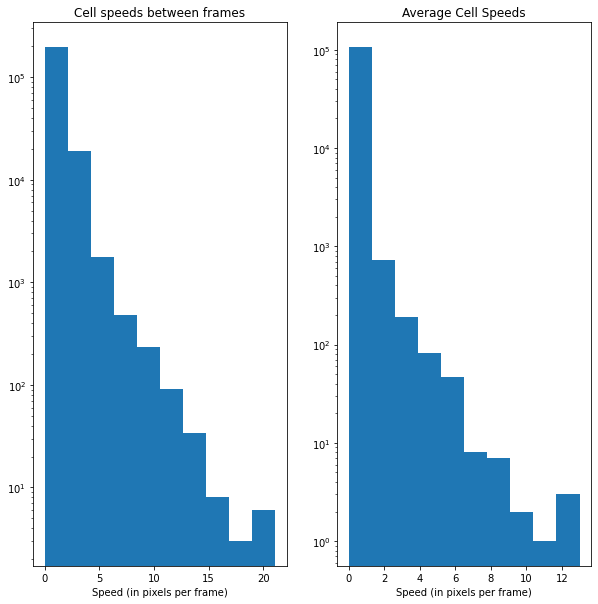

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,10))
ax1.hist(tracks['speed'], log = True)
ax1.set_title('Cell speeds between frames')
ax1.set_xlabel('Speed (in pixels per frame)')
ax2.hist(avg_speeds, log= True)
ax2.set_title('Average Cell Speeds')
ax2.set_xlabel('Speed (in pixels per frame)')

## Check Neighborhoods

Given a `tracks` DataFrame and a chosen tracked cell, the `check_nbhd` method outputs a subDataFrame containing all cells within a 4\*diameter radius of the chosen cell. 

With this method we can then oberseve community behavior inside this small neighborhood of the chosen cell. This method will help us to answer questions like:
1. What is the moving behavior of neighboring cells.
2. Do neighboring cells have a higher rate of netosis near a cell that has already undergone netosis?
3. Do neighboring cells avoid cells which have already gone though netosis?

In [32]:
t = pd.read_csv('tracks_w_velocity.csv')
c = t.loc[t['cell']==11]
c

,Unnamed: 0,index,cell,frame,xcoord,ycoord,velocity,speed
14,14,14,11.0,0.0,770.0,92.0,"(0.0, 0.0)",0.000000
15,15,15,11.0,1.0,772.0,85.0,"(2.0, -7.0)",7.280110
16,16,16,11.0,2.0,774.0,88.0,"(2.0, 3.0)",3.605551
17,17,17,11.0,3.0,777.0,87.0,"(3.0, -1.0)",3.162278
18,18,18,11.0,4.0,779.0,91.0,"(2.0, 4.0)",4.472136
...,...,...,...,...,...,...,...,...
250,250,250,11.0,236.0,761.0,95.0,"(0.0, 3.0)",3.000000
251,251,251,11.0,237.0,761.0,97.0,"(0.0, 2.0)",2.000000
252,252,252,11.0,238.0,761.0,96.0,"(0.0, -1.0)",1.000000
253,253,253,11.0,239.0,761.0,96.0,"(0.0, 0.0)",0.000000


,Unnamed: 0,index,cell,frame,xcoord,ycoord,velocity,speed
0,14,14,11.0,0.0,770.0,92.0,"(0.0, 0.0)",0.0
1,1518,1518,104.0,0.0,832.0,122.0,"(0.0, 0.0)",0.0
2,4524,4524,266.0,0.0,797.0,169.0,"(0.0, 0.0)",0.0
3,6896,6896,483.0,0.0,802.0,88.0,"(0.0, 0.0)",0.0
4,8501,8501,525.0,0.0,781.0,53.0,"(0.0, 0.0)",0.0
...,...,...,...,...,...,...,...,...
2023,48397,48397,2594.0,240.0,756.0,146.0,"(0.0, -1.0)",1.0
2024,85356,85356,9085.0,240.0,689.0,92.0,"(0.0, -1.0)",1.0
2025,102075,102075,18239.0,240.0,827.0,63.0,"(0.0, -1.0)",1.0
2026,147739,147739,49263.0,240.0,813.0,155.0,"(0.0, -1.0)",1.0


/home/hfriz/.local/lib/python3.8/site-packages/matplotlib/quiver.py:689: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/hfriz/.local/lib/python3.8/site-packages/matplotlib/quiver.py:689: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


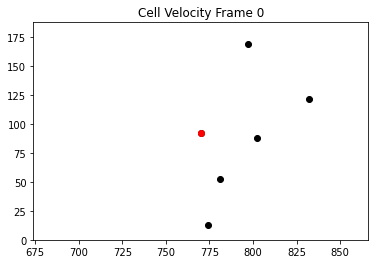

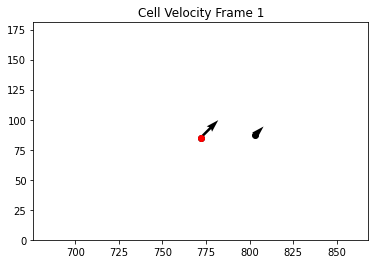

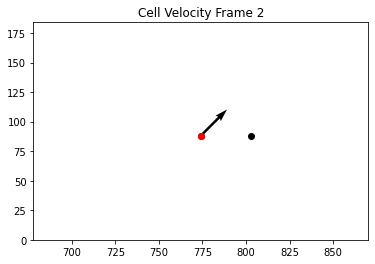

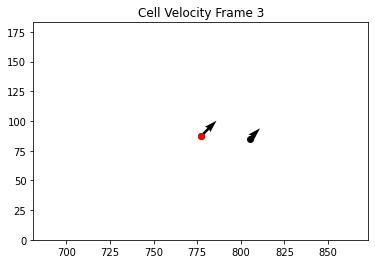

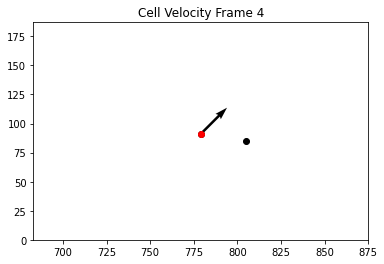

In [35]:
nbhd = Analytics.check_nbhd(c,t, plots = True, max_plots=5)
nbhd

1160    (0.0, 1.0)
Name: velocity, dtype: object


(array([5., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

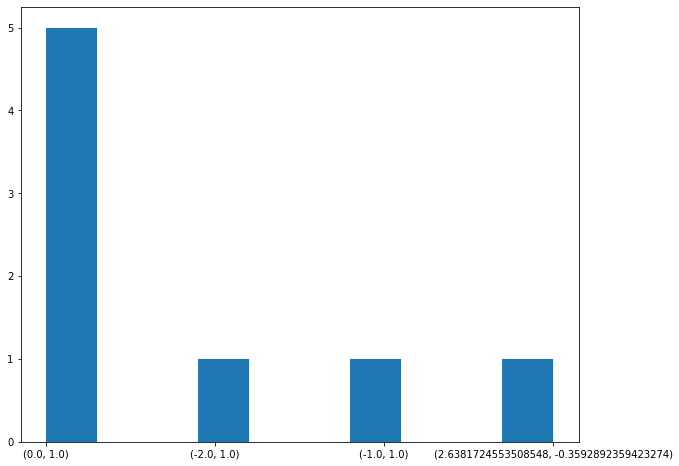

In [36]:
print(nbhd.loc[(nbhd['frame']==150) & (nbhd['cell']==11)]['velocity'])
f, a = plt.subplots(figsize=(10,8))
a.hist(nbhd.loc[nbhd['frame']==150]['velocity'])